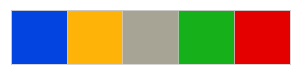

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

import numpy as np
import datetime as dt
from dateutil.relativedelta import relativedelta
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#sns.set_palette("GnBu_d")
sns.set_style('whitegrid')
colors = ["blue", "amber", "greyish", "green", "red"]
my_palette=sns.palplot(sns.xkcd_palette(colors))

# use the fivethirtyeight style
plt.style.use('fivethirtyeight')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

import datetime as dt

Source data: <br>
https://data.cityofnewyork.us/Health/DOHMH-Childcare-Center-Inspections/dsg6-ifza

Load and check data.

In [2]:
data = pd.read_csv('DOHMH_Childcare_Center_Inspections.csv', sep = ',', 
                   parse_dates = ['Permit Expiration','Date Permitted','Inspection Date'])
data.columns

Index(['Center Name', 'Legal Name', 'Building', 'Street', 'Borough', 'ZipCode',
       'Phone', 'Permit Number', 'Permit Expiration', 'Status', 'Age Range',
       'Maximum Capacity', 'Day Care ID', 'Program Type', 'Facility Type',
       'Child Care Type', 'Building Identification Number', 'URL',
       'Date Permitted', 'Actual', 'Violation Rate Percent',
       'Average Violation Rate Percent', 'Total Educational Workers',
       'Average Total Educational Workers',
       'Public Health Hazard Violation Rate',
       'Average Public Health Hazard Violation Rate',
       'Critical Violation Rate', 'Average Critical Violation Rate',
       'Inspection Date', 'Regulation Summary', 'Violation Category',
       'Health Code Sub Section', 'Violation Status',
       'Inspection Summary Result'],
      dtype='object')

In [3]:
# get rid of the spaces between colunm names
data.columns = data.columns.str.replace(' ', '')
data.shape

(56558, 34)

In [4]:
data.head()

,CenterName,LegalName,Building,Street,Borough,ZipCode,Phone,PermitNumber,PermitExpiration,Status,AgeRange,MaximumCapacity,DayCareID,ProgramType,FacilityType,ChildCareType,BuildingIdentificationNumber,URL,DatePermitted,Actual,ViolationRatePercent,AverageViolationRatePercent,TotalEducationalWorkers,AverageTotalEducationalWorkers,PublicHealthHazardViolationRate,AveragePublicHealthHazardViolationRate,CriticalViolationRate,AverageCriticalViolationRate,InspectionDate,RegulationSummary,ViolationCategory,HealthCodeSubSection,ViolationStatus,InspectionSummaryResult
0,YOUNG PEOPLE'S DAY CAMP OF QUEENS,"Young Children's Day Camp, LTD",248-03,Francis Lewis Blouelvard,QUEENS,NaN,631-209-2041,104866.0,2019-09-15,Permitted,0 YEARS - 16 YEARS,0,DC38341,ALL AGE CAMP,Camp,Camp,0,NaN,2019-06-07,Y,NaN,NaN,0,1.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
1,CAMP OSHRAT,Hebrew Educational Society of Brooklyn,2186,Mill Avenue,BROOKLYN,11234.0,718-241-3000,104867.0,2019-09-15,Permitted,0 YEARS - 16 YEARS,0,DC38398,ALL AGE CAMP,Camp,Camp,3332530,TheHES.org,2019-06-10,Y,NaN,NaN,0,1.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
2,YESHIVAT OHR HAIIM,YESHIVAT OHR HAIIM,86-06,135TH STREET,QUEENS,11418.0,718-658-7066,NaN,2115-01-23,Active,3 YEARS - 5 YEARS,0,DC20398,PRESCHOOL,SBCC,School Based Child Care,4206444,NaN,NaT,NaN,100.0,NaN,0,0.0,50.0,NaN,100.0,NaN,2019-01-31,Written safety plan describes provisions for h...,GENERAL,43.07(b)(4),CORRECTED,Initial Annual Inspection - Reinspection Required
3,YESHIVAT OHR HAIIM,YESHIVAT OHR HAIIM,86-06,135TH STREET,QUEENS,11418.0,718-658-7066,NaN,2115-01-23,Active,3 YEARS - 5 YEARS,0,DC20398,PRESCHOOL,SBCC,School Based Child Care,4206444,NaN,NaT,NaN,100.0,NaN,0,0.0,50.0,NaN,100.0,NaN,2018-05-30,There were no new violations observed at the t...,NaN,NaN,NaN,Compliance Inspection of Open Violations - Pre...
4,"ESF, INC",ESF Camp Riverdale,1,SPAULDING LANE,BRONX,10471.0,718-432-1013,104551.0,2019-09-15,Permitted,0 YEARS - 16 YEARS,0,DC37193,ALL AGE CAMP,Camp,Camp,2090707,www.esfcamps.com/riverdale,2018-08-07,Y,NaN,NaN,0,1.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


---

Change date format and check date ranges. The inspection time range is from 2016-07-12 to 2019-07-11, i.e. 3 years.

In [5]:
# change date format 
data['InspectionDate'] = pd.to_datetime(data['InspectionDate']).dt.date
data['DatePermitted'] = pd.to_datetime(data['DatePermitted']).dt.date
data['PermitExpiration'] = pd.to_datetime(data['PermitExpiration']).dt.date

# check data date range
print('min inspection date: ', min(data['InspectionDate'].dropna()))
print('max inspection date: ', max(data['InspectionDate'].dropna()))
print('min permitted date: ', min(data['DatePermitted'].dropna()))
print('max permitted date: ', max(data['DatePermitted'].dropna()))
print('min permit expiration date: ', min(data['PermitExpiration']))
print('max permit expiration date: ', max(data['PermitExpiration']))

min inspection date:  2016-07-12
max inspection date:  2019-07-11
min permitted date:  1943-10-08
max permitted date:  2019-07-11
min permit expiration date:  1900-01-01
max permit expiration date:  2117-09-17


---

Fix the IDs' string length.

In [6]:
# fix date and id strings, etc.
data['ZipCode'] = data['ZipCode'].fillna(0)
data['ZipCode'] = (data['ZipCode'].astype(int)).astype(str)
data['ZipCode'] = data['ZipCode'].map(str).apply(lambda x: x.zfill(5))

data['PermitNumber'] = data['PermitNumber'].fillna(0)
data['PermitNumber'] = (data['PermitNumber'].astype(int)).astype(str)
data['PermitNumber'] = data['PermitNumber'].map(str).apply(lambda x: x.zfill(6))

data['BuildingIdentificationNumber'] = data['BuildingIdentificationNumber'].map(str).apply(lambda x: x.zfill(7))

data.rename(columns = {'BuildingIdentificationNumber':'BuildingID'}, inplace = True)

data['InspectionMonth'] = data['InspectionDate'].astype(str).apply(lambda x: x[0:7])

---

When the InspectionDate is missing, the following features' values are all missing:

* ViolationRatePercent
* PublicHealthHazardViolationRate
* CriticalViolationRate
* RegulationSummary
* ViolationCategory
* HealthCodeSubSection
* ViolationStatus
* InspectionSummaryResult

Since we will focus on inspection and violation, we will drop the facilities with no inspection dates.

In [7]:
data = data.dropna(subset=['InspectionDate']).reset_index(drop=True) # 56,397 non-missing dates
print(data.shape)
data.head()

(56397, 35)


,CenterName,LegalName,Building,Street,Borough,ZipCode,Phone,PermitNumber,PermitExpiration,Status,AgeRange,MaximumCapacity,DayCareID,ProgramType,FacilityType,ChildCareType,BuildingID,URL,DatePermitted,Actual,ViolationRatePercent,AverageViolationRatePercent,TotalEducationalWorkers,AverageTotalEducationalWorkers,PublicHealthHazardViolationRate,AveragePublicHealthHazardViolationRate,CriticalViolationRate,AverageCriticalViolationRate,InspectionDate,RegulationSummary,ViolationCategory,HealthCodeSubSection,ViolationStatus,InspectionSummaryResult,InspectionMonth
0,YESHIVAT OHR HAIIM,YESHIVAT OHR HAIIM,86-06,135TH STREET,QUEENS,11418,718-658-7066,000000,2115-01-23,Active,3 YEARS - 5 YEARS,0,DC20398,PRESCHOOL,SBCC,School Based Child Care,4206444,NaN,NaT,NaN,100.0,NaN,0,0.0,50.0,NaN,100.0,NaN,2019-01-31,Written safety plan describes provisions for h...,GENERAL,43.07(b)(4),CORRECTED,Initial Annual Inspection - Reinspection Required,2019-01
1,YESHIVAT OHR HAIIM,YESHIVAT OHR HAIIM,86-06,135TH STREET,QUEENS,11418,718-658-7066,000000,2115-01-23,Active,3 YEARS - 5 YEARS,0,DC20398,PRESCHOOL,SBCC,School Based Child Care,4206444,NaN,NaT,NaN,100.0,NaN,0,0.0,50.0,NaN,100.0,NaN,2018-05-30,There were no new violations observed at the t...,NaN,NaN,NaN,Compliance Inspection of Open Violations - Pre...,2018-05
2,YESHIVAT OHR HAIIM,YESHIVAT OHR HAIIM,86-06,135TH STREET,QUEENS,11418,718-658-7066,000000,2115-01-23,Active,3 YEARS - 5 YEARS,0,DC20398,PRESCHOOL,SBCC,School Based Child Care,4206444,NaN,NaT,NaN,100.0,NaN,0,0.0,50.0,NaN,100.0,NaN,2019-01-31,Children enrolled in school-based child care p...,CRITICAL,43.17(a)(1),CORRECTED,Initial Annual Inspection - Reinspection Required,2019-01
3,YESHIVAT OHR HAIIM,YESHIVAT OHR HAIIM,86-06,135TH STREET,QUEENS,11418,718-658-7066,000000,2115-01-23,Active,3 YEARS - 5 YEARS,0,DC20398,PRESCHOOL,SBCC,School Based Child Care,4206444,NaN,NaT,NaN,100.0,NaN,0,0.0,50.0,NaN,100.0,NaN,2019-04-16,There were no new violations observed at the t...,NaN,NaN,NaN,Compliance Inspection of Open Violations - Pre...,2019-04
4,YESHIVAT OHR HAIIM,YESHIVAT OHR HAIIM,86-06,135TH STREET,QUEENS,11418,718-658-7066,000000,2115-01-23,Active,3 YEARS - 5 YEARS,0,DC20398,PRESCHOOL,SBCC,School Based Child Care,4206444,NaN,NaT,NaN,100.0,NaN,0,0.0,50.0,NaN,100.0,NaN,2018-04-17,Sufficient handwash sinks with hot and cold ru...,CRITICAL,131.09(d)(2),CORRECTED,Initial Annual Inspection - Reinspection Required,2018-04


---

Check the categorical variables and fill in missing values as 'unknown'.

In [8]:
# check category variables' values
print('status: ', data['Status'].unique())
print('age range: ', data['AgeRange'].unique())
print('program type: ', data['ProgramType'].unique())
print('facility type: ', data['FacilityType'].unique())
print('child care type: ', data['ChildCareType'].unique())
print('violation category: ', data['ViolationCategory'].unique()) 
print('violation status: ', data['ViolationStatus'].unique())

status:  ['Active' 'Permitted' 'Expired-In Renewal']
age range:  ['3 YEARS - 5 YEARS' '2 YEARS - 5 YEARS' '0 YEARS - 16 YEARS'
 '0 YEARS - 2 YEARS' nan '6 YEARS - 16 YEARS']
program type:  ['PRESCHOOL' 'ALL AGE CAMP' 'INFANT TODDLER' 'SCHOOL AGE CAMP' 'Preschool'
 'PRESCHOOL CAMP']
facility type:  ['SBCC' 'Camp' 'CAMP' 'GDC']
child care type:  ['School Based Child Care' 'Camp' 'Child Care - Infants/Toddlers'
 'Child Care - Pre School']
violation category:  ['GENERAL' nan 'CRITICAL' 'PUBLIC HEALTH HAZARD']
violation status:  ['CORRECTED' nan 'OPEN']


In [9]:
# correct category features' values
def mapstatus(x):
    if(x == 'Permitted'):
        return 'Permitted'
    elif (x == 'Active'):
        return 'Active'
    elif (x == 'Expired-In Renewal'):
        return 'ExpiredInRenewal'

def mapagerange(x):
    if(x == '0 YEARS - 2 YEARS'):
        return '0-2'
    elif (x == '2 YEARS - 5 YEARS'):
        return '2-5'
    elif (x == '3 YEARS - 5 YEARS'):
        return '3-5'
    elif (x == '6 YEARS - 16 YEARS'):
        return '6-16'
    elif (x == '0 YEARS - 16 YEARS'):
        return '0-16'
    else:
        return 'na'

def mapprogram(x):
    if(x == 'ALL AGE CAMP'):
        return 'AllAgeCamp'
    elif (x == 'All Age Camp'):
        return 'AllAgeCamp'
    elif (x == 'PRESCHOOL'):
        return 'Preschool'
    elif (x == 'SCHOOL AGE CAMP'):
        return 'SchoolAgeCamp'
    elif (x == 'PRESCHOOL CAMP'):
        return 'PreschoolCamp'
    elif (x == 'INFANT TODDLER'):
        return 'InfantToddler'
    else:
        return 'Unknown'

def mapfacility(x):
    if(x == 'Camp'):
        return 'CAMP'
    elif (x == 'CAMP'):
        return 'CAMP'
    elif (x == 'SBCC'):
        return 'SBCC'
    elif (x == 'GDC'):
        return 'GDC'

def mapchildcare(x):
    if(x == 'Camp'):
        return 'Camp'
    elif (x == 'School Based Child Care'):
        return 'SchoolBasedChildCare'
    elif (x == 'Child Care - Infants/Toddlers'):
        return 'ChildCareInfantsToddlers'
    elif (x == 'Child Care - Pre School'):
        return 'ChildCarePreSchool'

def mapviolationstatus(x):
    if(x == 'CORRECTED'):
        return 'Corrected'
    elif (x == 'OPEN'):
        return 'Open'
    else:
        return 'Unknown'
    
def mapviolationcat(x):
    if(x == 'GENERAL'):
        return 'General'
    elif (x == 'CRITICAL'):
        return 'Critical'
    elif (x == 'PUBLIC HEALTH HAZARD'):
        return 'PublicHealthHazard'
    else:
        return 'Unknown'

In [10]:
data['Status'] = data['Status'].apply(mapstatus).astype(str)
print(data['Status'].value_counts())

data['AgeRange'] = data['AgeRange'].apply(mapagerange).astype(str)
print(data['AgeRange'].value_counts())
    
data['ProgramType'] = data['ProgramType'].apply(mapprogram).astype(str)
print(data['ProgramType'].value_counts())
    
data['FacilityType'] = data['FacilityType'].apply(mapfacility).astype(str)
print(data['FacilityType'].value_counts())
    
data['ChildCareType'] = data['ChildCareType'].apply(mapchildcare).astype(str)
print(data['ChildCareType'].value_counts())

data['ViolationStatus'] = data['ViolationStatus'].apply(mapviolationstatus).astype(str)
print(data['ViolationStatus'].value_counts())

data['ViolationCategory'] = data['ViolationCategory'].apply(mapviolationcat).astype(str)
print(data['ViolationCategory'].value_counts())

Permitted           47400
Active               6799
ExpiredInRenewal     2198
Name: Status, dtype: int64
2-5     39150
0-2      6488
na       4842
3-5      2928
0-16     2853
6-16      136
Name: AgeRange, dtype: int64
Preschool        46245
InfantToddler     7098
AllAgeCamp        2900
SchoolAgeCamp      136
Unknown             16
PreschoolCamp        2
Name: ProgramType, dtype: int64
GDC     46560
SBCC     6799
CAMP     3038
Name: FacilityType, dtype: int64
ChildCarePreSchool          39462
ChildCareInfantsToddlers     7098
SchoolBasedChildCare         6799
Camp                         3038
Name: ChildCareType, dtype: int64
Corrected    39484
Unknown      15110
Open          1803
Name: ViolationStatus, dtype: int64
General               21958
Unknown               15110
Critical              13617
PublicHealthHazard     5712
Name: ViolationCategory, dtype: int64


---

After spot checkinge data, we can safely assume the following features do not change during the 3-year study period:
* Status
* AgeRange
* ProgramType
* FacilityType
* ChildCareType

In [11]:
my_vars = ['DayCareID','PermitNumber','BuildingID','Borough','DatePermitted','Actual','PermitExpiration','Status','AgeRange',
           'ProgramType','FacilityType','ChildCareType','InspectionDate','ViolationCategory',
           'ViolationStatus','MaximumCapacity','ViolationRatePercent','AverageViolationRatePercent',
           'TotalEducationalWorkers','AverageTotalEducationalWorkers','PublicHealthHazardViolationRate',
           'AveragePublicHealthHazardViolationRate','CriticalViolationRate','AverageCriticalViolationRate']

In [12]:
mydata = data.filter(my_vars).drop_duplicates()
mydata.shape

(31228, 24)

In [13]:
mydata = pd.get_dummies(mydata, columns=['ViolationCategory','ViolationStatus'])
print(mydata.shape)
mydata.head(7)

(31228, 29)


,DayCareID,PermitNumber,BuildingID,Borough,DatePermitted,Actual,PermitExpiration,Status,AgeRange,ProgramType,FacilityType,ChildCareType,InspectionDate,MaximumCapacity,ViolationRatePercent,AverageViolationRatePercent,TotalEducationalWorkers,AverageTotalEducationalWorkers,PublicHealthHazardViolationRate,AveragePublicHealthHazardViolationRate,CriticalViolationRate,AverageCriticalViolationRate,ViolationCategory_Critical,ViolationCategory_General,ViolationCategory_PublicHealthHazard,ViolationCategory_Unknown,ViolationStatus_Corrected,ViolationStatus_Open,ViolationStatus_Unknown
0,DC20398,000000,4206444,QUEENS,NaT,NaN,2115-01-23,Active,3-5,Preschool,SBCC,SchoolBasedChildCare,2019-01-31,0,100.0,NaN,0,0.0,50.0,NaN,100.0,NaN,0,1,0,0,1,0,0
1,DC20398,000000,4206444,QUEENS,NaT,NaN,2115-01-23,Active,3-5,Preschool,SBCC,SchoolBasedChildCare,2018-05-30,0,100.0,NaN,0,0.0,50.0,NaN,100.0,NaN,0,0,0,1,0,0,1
2,DC20398,000000,4206444,QUEENS,NaT,NaN,2115-01-23,Active,3-5,Preschool,SBCC,SchoolBasedChildCare,2019-01-31,0,100.0,NaN,0,0.0,50.0,NaN,100.0,NaN,1,0,0,0,1,0,0
3,DC20398,000000,4206444,QUEENS,NaT,NaN,2115-01-23,Active,3-5,Preschool,SBCC,SchoolBasedChildCare,2019-04-16,0,100.0,NaN,0,0.0,50.0,NaN,100.0,NaN,0,0,0,1,0,0,1
4,DC20398,000000,4206444,QUEENS,NaT,NaN,2115-01-23,Active,3-5,Preschool,SBCC,SchoolBasedChildCare,2018-04-17,0,100.0,NaN,0,0.0,50.0,NaN,100.0,NaN,1,0,0,0,1,0,0
6,DC20398,000000,4206444,QUEENS,NaT,NaN,2115-01-23,Active,3-5,Preschool,SBCC,SchoolBasedChildCare,2018-04-17,0,100.0,NaN,0,0.0,50.0,NaN,100.0,NaN,0,0,1,0,1,0,0
9,DC11982,000000,1087705,MANHATTAN,NaT,NaN,2115-01-23,Active,2-5,Preschool,SBCC,SchoolBasedChildCare,2018-12-20,0,0.0,NaN,0,0.0,0.0,NaN,0.0,NaN,0,0,0,1,0,0,1


---

We observed that one day care can be inspected multiple times during the 3 years at any given time. Each inspection can find different types of violations, but with the same violation rate. Thus we will count the inspection frequency, sum up the violations by its categories, and take the average of the violation rates to derive a final data set for analysis.

In [14]:
avg_calc_vars = ['MaximumCapacity','ViolationRatePercent','AverageViolationRatePercent',
                 'TotalEducationalWorkers','AverageTotalEducationalWorkers','PublicHealthHazardViolationRate',
                 'AveragePublicHealthHazardViolationRate','CriticalViolationRate','AverageCriticalViolationRate']

sum_calc_vars = ['ViolationCategory_Critical','ViolationCategory_General','ViolationCategory_PublicHealthHazard',
                 'ViolationCategory_Unknown','ViolationStatus_Corrected','ViolationStatus_Open','ViolationStatus_Unknown']

fixed_vars = ['DayCareID','PermitNumber','BuildingID','Borough','DatePermitted','Actual','PermitExpiration',
              'Status','AgeRange','ProgramType','FacilityType','ChildCareType']

In [15]:
temp1 = mydata.drop(columns = avg_calc_vars, axis=1)
sum_data = temp1.drop(columns = 'InspectionDate', axis=1)
temp2 = mydata.drop(columns = sum_calc_vars, axis=1)
avg_data = temp2.drop(columns = 'InspectionDate', axis=1)
freq_data = temp1.drop(columns = sum_calc_vars, axis=1)

In [16]:
freq_data = freq_data.groupby(fixed_vars)['InspectionDate'].apply(lambda x: x.unique().shape[0]).reset_index()
print(freq_data.shape)
freq_data.head()

(2750, 13)


,DayCareID,PermitNumber,BuildingID,Borough,DatePermitted,Actual,PermitExpiration,Status,AgeRange,ProgramType,FacilityType,ChildCareType,InspectionDate
0,DC1000,002165,3054624,BROOKLYN,2004-03-30,N,2020-04-06,Permitted,2-5,Preschool,GDC,ChildCarePreSchool,12
1,DC1017,005465,3124528,BROOKLYN,1988-09-15,Y,2020-12-16,Permitted,2-5,Preschool,GDC,ChildCarePreSchool,7
2,DC1021,004135,3063253,BROOKLYN,2003-11-24,N,2019-08-07,Permitted,2-5,Preschool,GDC,ChildCarePreSchool,18
3,DC10244,006700,4436607,QUEENS,2003-12-01,N,2019-12-04,Permitted,2-5,Preschool,GDC,ChildCarePreSchool,9
4,DC1025,006699,3000000,BROOKLYN,2005-09-14,N,2019-09-14,Permitted,2-5,Preschool,GDC,ChildCarePreSchool,9


In [17]:
avg_data = avg_data.groupby(fixed_vars).mean().reset_index()
print(avg_data.shape)
avg_data.head()

(2750, 21)


,DayCareID,PermitNumber,BuildingID,Borough,DatePermitted,Actual,PermitExpiration,Status,AgeRange,ProgramType,FacilityType,ChildCareType,MaximumCapacity,ViolationRatePercent,AverageViolationRatePercent,TotalEducationalWorkers,AverageTotalEducationalWorkers,PublicHealthHazardViolationRate,AveragePublicHealthHazardViolationRate,CriticalViolationRate,AverageCriticalViolationRate
0,DC1000,002165,3054624,BROOKLYN,2004-03-30,N,2020-04-06,Permitted,2-5,Preschool,GDC,ChildCarePreSchool,70,14.2857,34.5374,7,11.5288,14.2857,14.3262,14.2857,31.0829
1,DC1017,005465,3124528,BROOKLYN,1988-09-15,Y,2020-12-16,Permitted,2-5,Preschool,GDC,ChildCarePreSchool,105,20.0000,34.5374,12,11.5288,0.0000,14.3262,20.0000,31.0829
2,DC1021,004135,3063253,BROOKLYN,2003-11-24,N,2019-08-07,Permitted,2-5,Preschool,GDC,ChildCarePreSchool,162,33.3333,34.5374,24,11.5288,0.0000,14.3262,33.3333,31.0829
3,DC10244,006700,4436607,QUEENS,2003-12-01,N,2019-12-04,Permitted,2-5,Preschool,GDC,ChildCarePreSchool,150,20.0000,34.5374,49,11.5288,0.0000,14.3262,20.0000,31.0829
4,DC1025,006699,3000000,BROOKLYN,2005-09-14,N,2019-09-14,Permitted,2-5,Preschool,GDC,ChildCarePreSchool,17,50.0000,34.5374,3,11.5288,16.6667,14.3262,50.0000,31.0829


In [18]:
sum_data = sum_data.groupby(fixed_vars).sum().reset_index()
print(sum_data.shape)
sum_data.head()

(2750, 19)


,DayCareID,PermitNumber,BuildingID,Borough,DatePermitted,Actual,PermitExpiration,Status,AgeRange,ProgramType,FacilityType,ChildCareType,ViolationCategory_Critical,ViolationCategory_General,ViolationCategory_PublicHealthHazard,ViolationCategory_Unknown,ViolationStatus_Corrected,ViolationStatus_Open,ViolationStatus_Unknown
0,DC1000,002165,3054624,BROOKLYN,2004-03-30,N,2020-04-06,Permitted,2-5,Preschool,GDC,ChildCarePreSchool,1,3,2,8,6,0,8
1,DC1017,005465,3124528,BROOKLYN,1988-09-15,Y,2020-12-16,Permitted,2-5,Preschool,GDC,ChildCarePreSchool,1,4,0,3,4,1,3
2,DC1021,004135,3063253,BROOKLYN,2003-11-24,N,2019-08-07,Permitted,2-5,Preschool,GDC,ChildCarePreSchool,6,6,0,10,10,2,10
3,DC10244,006700,4436607,QUEENS,2003-12-01,N,2019-12-04,Permitted,2-5,Preschool,GDC,ChildCarePreSchool,2,1,0,7,3,0,7
4,DC1025,006699,3000000,BROOKLYN,2005-09-14,N,2019-09-14,Permitted,2-5,Preschool,GDC,ChildCarePreSchool,3,3,1,6,6,1,6


In [19]:
# merge data
x = avg_data[avg_calc_vars]
y = sum_data[sum_calc_vars]
new_data = pd.concat([freq_data, x, y], axis=1, sort=False)
new_data.rename(columns = {'InspectionDate':'InspectionCount',
                           'ViolationCategory_Critical':'CriticalViolation',
                           'ViolationCategory_General':'GeneralViolation', 
                           'ViolationCategory_PublicHealthHazard':'PublicHealthHazardViolation',
                           'ViolationCategory_Unknown':'UnknownViolation', 
                           'ViolationStatus_Corrected':'CorrectedViolationStatus',
                           'ViolationStatus_Open':'OpenViolationStatus', 
                           'ViolationStatus_Unknown':'UnknownViolationStatus'}, inplace = True)
print(new_data.shape)
new_data.head()

(2750, 29)


,DayCareID,PermitNumber,BuildingID,Borough,DatePermitted,Actual,PermitExpiration,Status,AgeRange,ProgramType,FacilityType,ChildCareType,InspectionCount,MaximumCapacity,ViolationRatePercent,AverageViolationRatePercent,TotalEducationalWorkers,AverageTotalEducationalWorkers,PublicHealthHazardViolationRate,AveragePublicHealthHazardViolationRate,CriticalViolationRate,AverageCriticalViolationRate,CriticalViolation,GeneralViolation,PublicHealthHazardViolation,UnknownViolation,CorrectedViolationStatus,OpenViolationStatus,UnknownViolationStatus
0,DC1000,002165,3054624,BROOKLYN,2004-03-30,N,2020-04-06,Permitted,2-5,Preschool,GDC,ChildCarePreSchool,12,70,14.2857,34.5374,7,11.5288,14.2857,14.3262,14.2857,31.0829,1,3,2,8,6,0,8
1,DC1017,005465,3124528,BROOKLYN,1988-09-15,Y,2020-12-16,Permitted,2-5,Preschool,GDC,ChildCarePreSchool,7,105,20.0000,34.5374,12,11.5288,0.0000,14.3262,20.0000,31.0829,1,4,0,3,4,1,3
2,DC1021,004135,3063253,BROOKLYN,2003-11-24,N,2019-08-07,Permitted,2-5,Preschool,GDC,ChildCarePreSchool,18,162,33.3333,34.5374,24,11.5288,0.0000,14.3262,33.3333,31.0829,6,6,0,10,10,2,10
3,DC10244,006700,4436607,QUEENS,2003-12-01,N,2019-12-04,Permitted,2-5,Preschool,GDC,ChildCarePreSchool,9,150,20.0000,34.5374,49,11.5288,0.0000,14.3262,20.0000,31.0829,2,1,0,7,3,0,7
4,DC1025,006699,3000000,BROOKLYN,2005-09-14,N,2019-09-14,Permitted,2-5,Preschool,GDC,ChildCarePreSchool,9,17,50.0000,34.5374,3,11.5288,16.6667,14.3262,50.0000,31.0829,3,3,1,6,6,1,6


In [20]:
new_data.describe(include="O")

,DayCareID,PermitNumber,BuildingID,Borough,Actual,Status,AgeRange,ProgramType,FacilityType,ChildCareType
count,2750,2750,2750,2750,2750,2750,2750,2750,2750,2750
unique,2750,2750,1349,5,2,2,5,5,2,3
top,DC24746,033915,0000000,BROOKLYN,Y,Permitted,2-5,Preschool,GDC,ChildCarePreSchool
freq,1,1,299,1007,1749,2627,1568,1743,2167,1743


---

Check for missing data.

In [21]:
# checking missing data
null_columns = new_data.columns[new_data.isnull().any()]
perc_missing = round((new_data[null_columns].isnull().sum()/len(new_data))*100,2)
print('% of Total Missing:')
print(perc_missing)

% of Total Missing:
ViolationRatePercent                      0.69
AverageViolationRatePercent               0.69
PublicHealthHazardViolationRate           0.69
AveragePublicHealthHazardViolationRate    0.69
CriticalViolationRate                     0.69
AverageCriticalViolationRate              0.69
dtype: float64


After checking the missing values in the new data set, we found that only 29 (0.69%) of day case centers are missing all the violation data. We decided to exclude these day care centers from our analysis.

In [22]:
new_data = new_data.dropna()
new_data.shape

(2731, 29)

---

###### Univariate Analysis

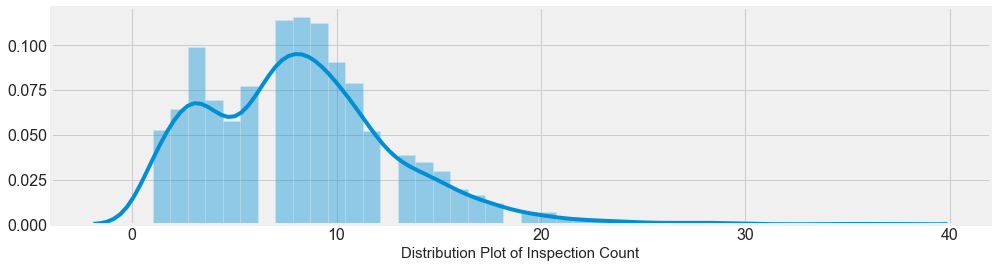

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
sns.distplot(new_data.InspectionCount.dropna())
plt.xlabel("Distribution Plot of Inspection Count", fontsize=15)
plt.show()

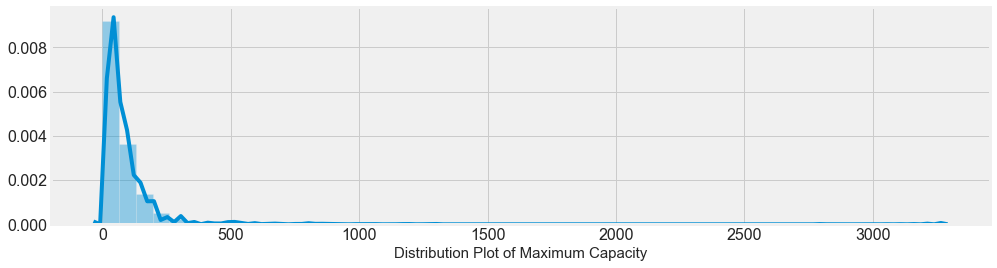

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
sns.distplot(new_data.MaximumCapacity.dropna())
plt.xlabel("Distribution Plot of Maximum Capacity", fontsize=15)
plt.show()

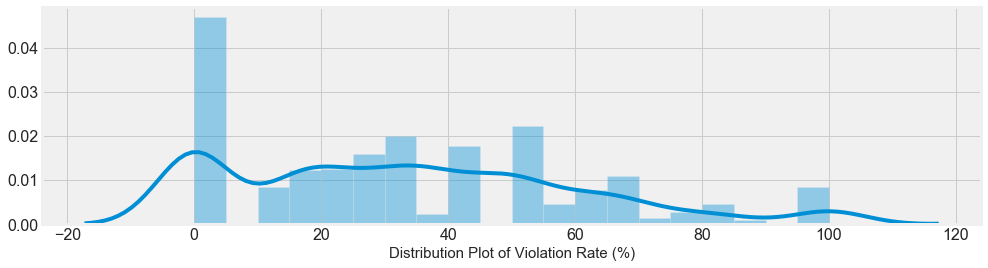

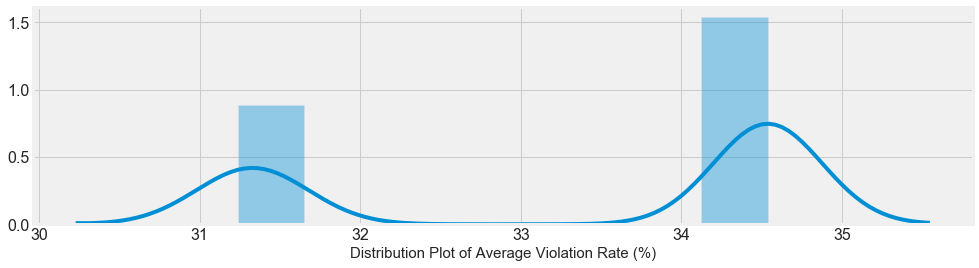

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
sns.distplot(new_data.ViolationRatePercent.dropna())
plt.xlabel("Distribution Plot of Violation Rate (%)", fontsize=15)
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
sns.distplot(new_data.AverageViolationRatePercent.dropna())
plt.xlabel("Distribution Plot of Average Violation Rate (%)", fontsize=15)
plt.show()

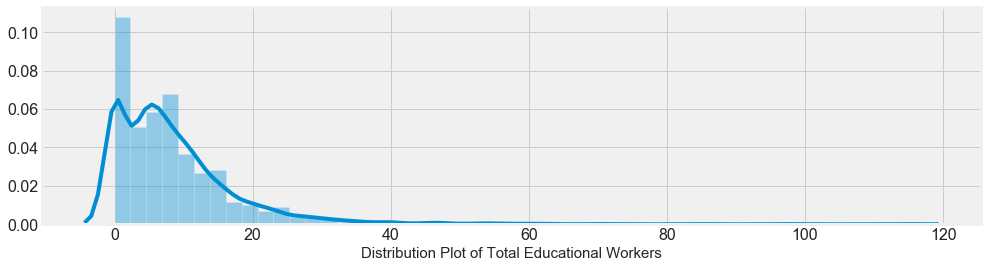

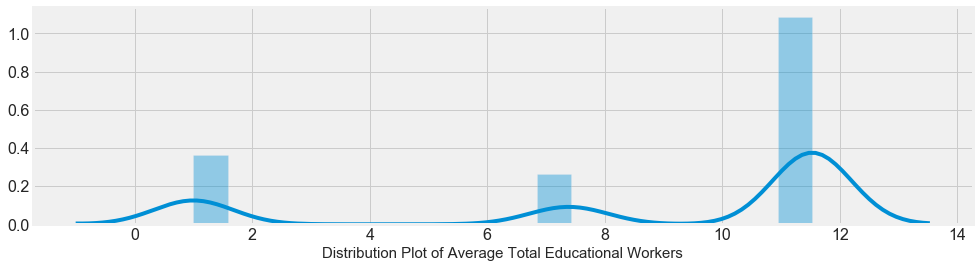

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
sns.distplot(new_data.TotalEducationalWorkers.dropna())
plt.xlabel("Distribution Plot of Total Educational Workers", fontsize=15)
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
sns.distplot(new_data.AverageTotalEducationalWorkers.dropna())
plt.xlabel("Distribution Plot of Average Total Educational Workers", fontsize=15)
plt.show()

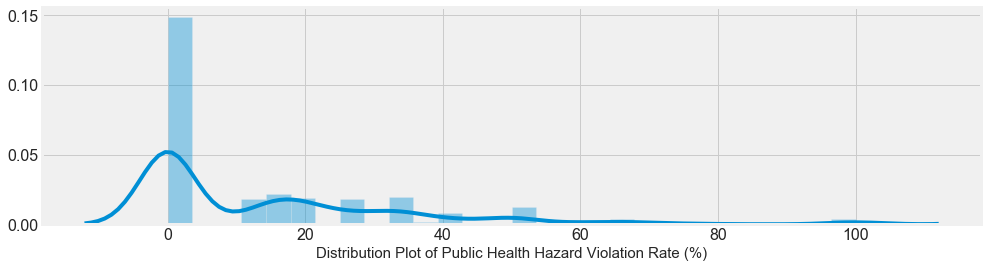

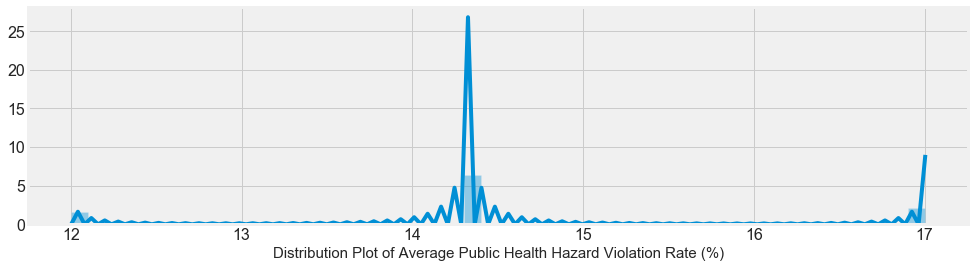

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
sns.distplot(new_data.PublicHealthHazardViolationRate.dropna())
plt.xlabel("Distribution Plot of Public Health Hazard Violation Rate (%)", fontsize=15)
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
sns.distplot(new_data.AveragePublicHealthHazardViolationRate.dropna())
plt.xlabel("Distribution Plot of Average Public Health Hazard Violation Rate (%)", fontsize=15)
plt.show()

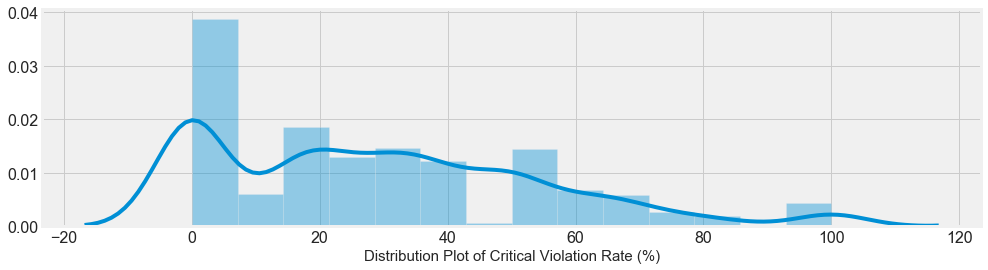

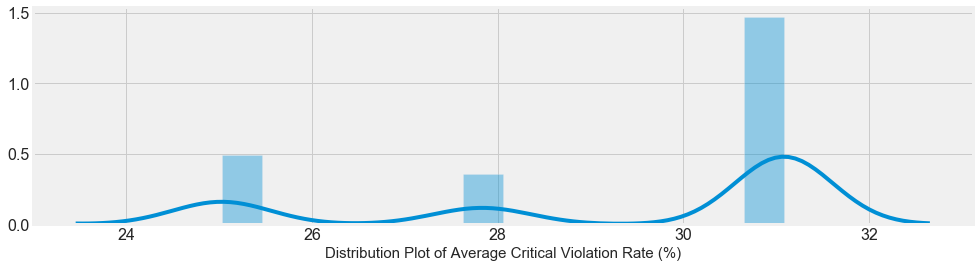

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
sns.distplot(new_data.CriticalViolationRate.dropna())
plt.xlabel("Distribution Plot of Critical Violation Rate (%)", fontsize=15)
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
sns.distplot(new_data.AverageCriticalViolationRate.dropna())
plt.xlabel("Distribution Plot of Average Critical Violation Rate (%)", fontsize=15)
plt.show()

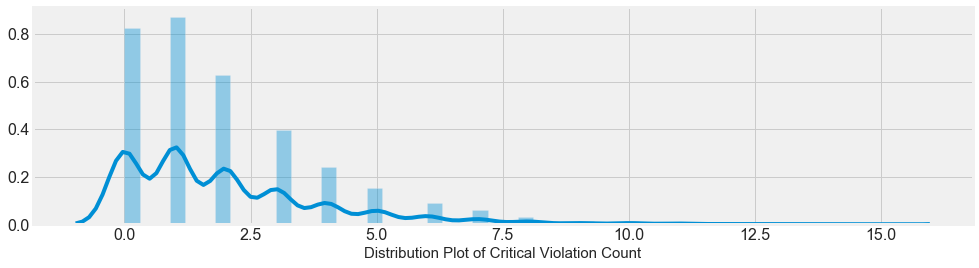

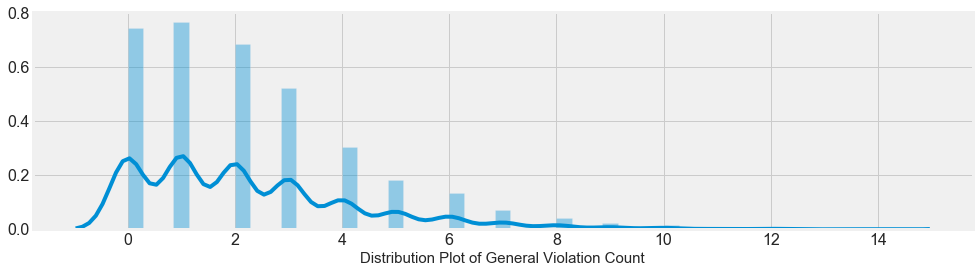

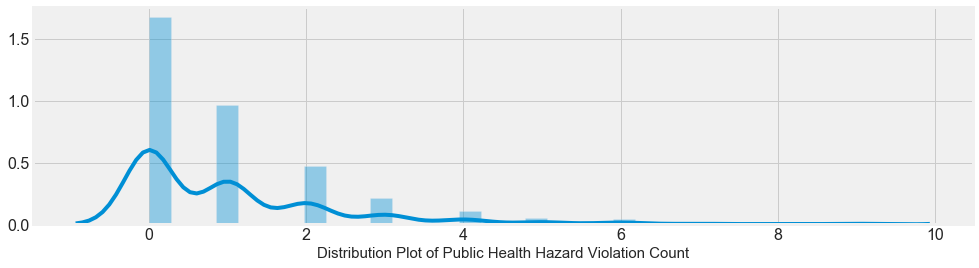

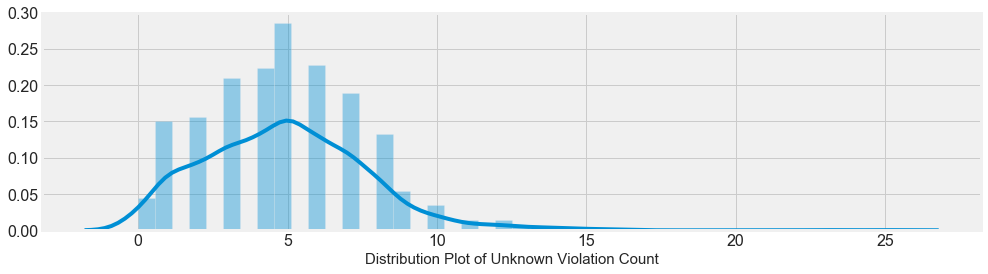

In [29]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
sns.distplot(new_data.CriticalViolation.dropna())
plt.xlabel("Distribution Plot of Critical Violation Count", fontsize=15)
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
sns.distplot(new_data.GeneralViolation.dropna())
plt.xlabel("Distribution Plot of General Violation Count", fontsize=15)
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
sns.distplot(new_data.PublicHealthHazardViolation.dropna())
plt.xlabel("Distribution Plot of Public Health Hazard Violation Count", fontsize=15)
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
sns.distplot(new_data.UnknownViolation.dropna())
plt.xlabel("Distribution Plot of Unknown Violation Count", fontsize=15)
plt.show()

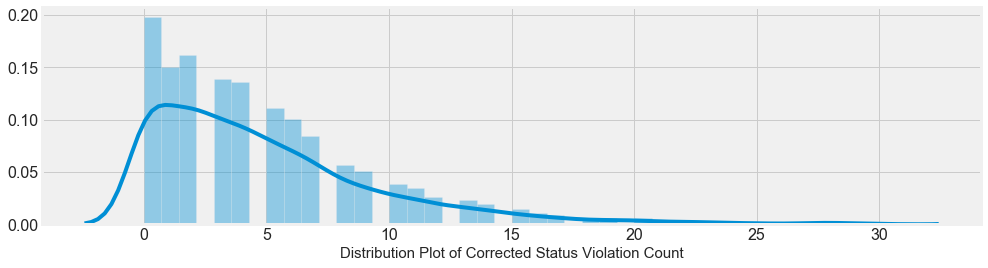

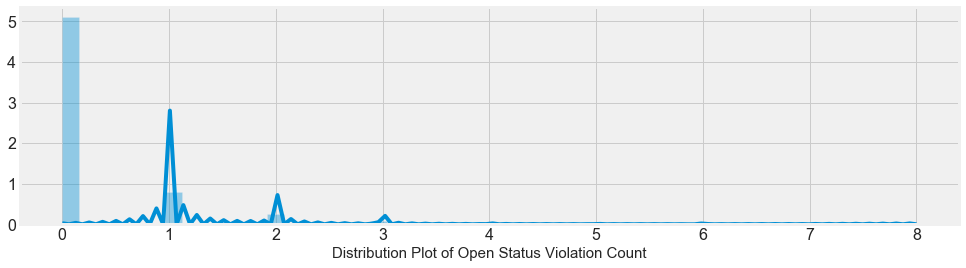

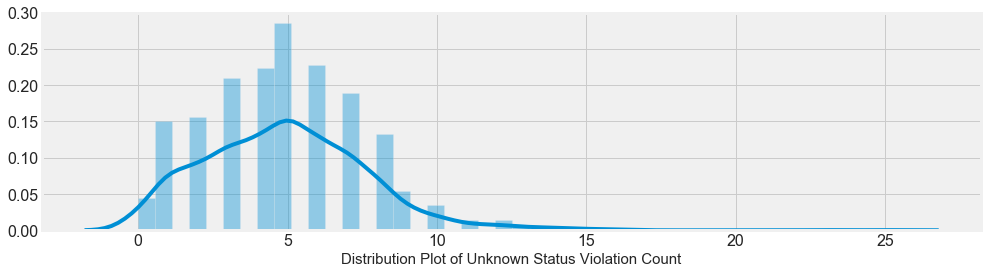

In [30]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
sns.distplot(new_data.CorrectedViolationStatus.dropna())
plt.xlabel("Distribution Plot of Corrected Status Violation Count", fontsize=15)
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
sns.distplot(new_data.OpenViolationStatus.dropna())
plt.xlabel("Distribution Plot of Open Status Violation Count", fontsize=15)
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
sns.distplot(new_data.UnknownViolationStatus.dropna())
plt.xlabel("Distribution Plot of Unknown Status Violation Count", fontsize=15)
plt.show()

---

###### Bi-variate Analysis

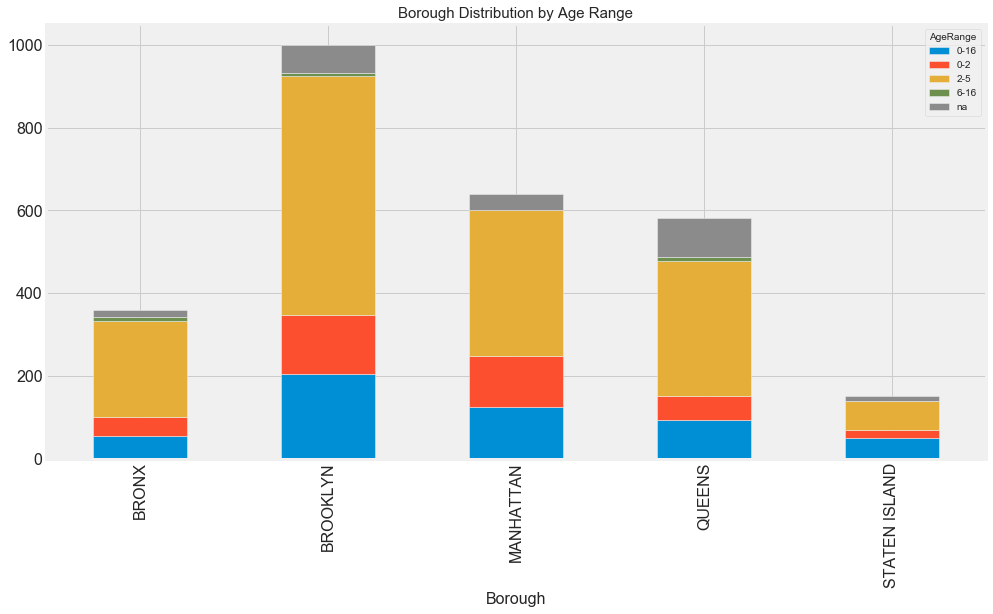

In [31]:
pd.crosstab(new_data.Borough, new_data.AgeRange).plot(kind="bar", figsize=(15,8), stacked=True)
plt.title('Borough Distribution by Age Range', fontsize = 15)
plt.show()

Brooklyn has the highest childcare facilities.  Most of the boroughs have facilities care for 2-5 year olds. 

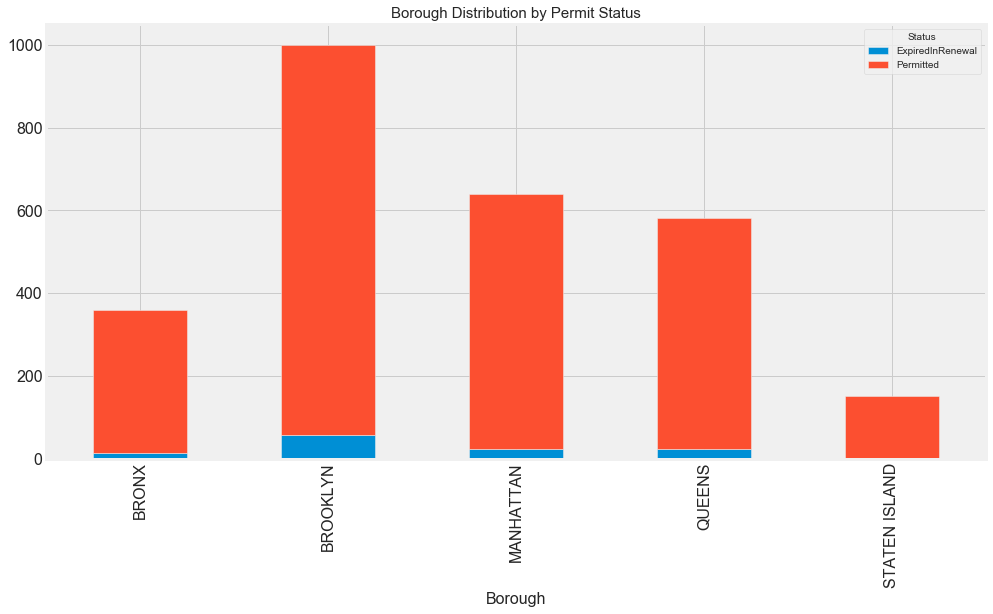

In [32]:
pd.crosstab(new_data.Borough, new_data.Status).plot(kind="bar", figsize=(15,8), stacked=True)
plt.title('Borough Distribution by Permit Status', fontsize = 15)
plt.show()

As expected, a very small amount of childcare facilities are in a renewal period.

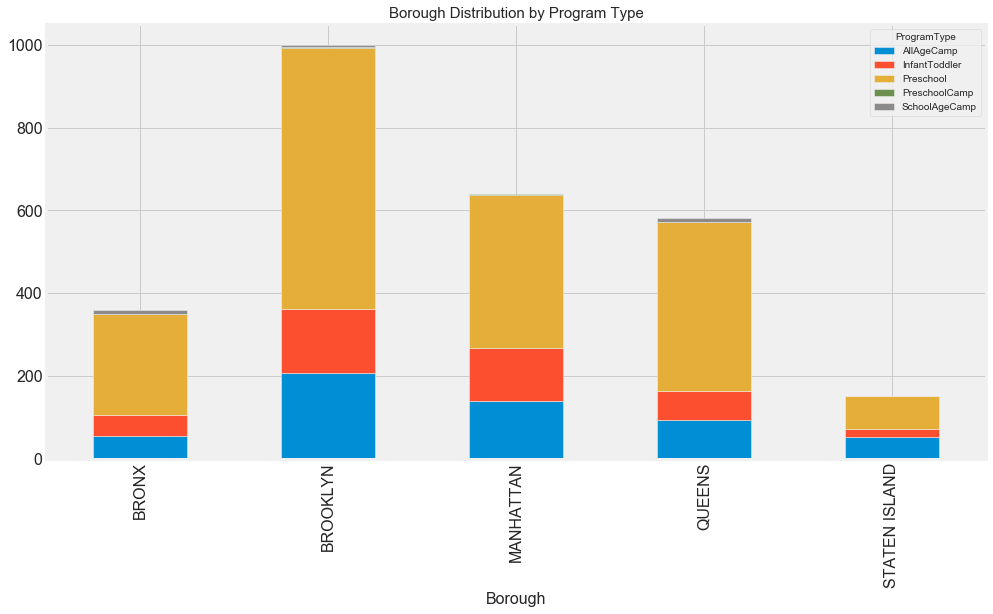

In [33]:
pd.crosstab(new_data.Borough, new_data.ProgramType).plot(kind="bar", figsize=(15,8), stacked=True)
plt.title('Borough Distribution by Program Type', fontsize = 15)
plt.show()

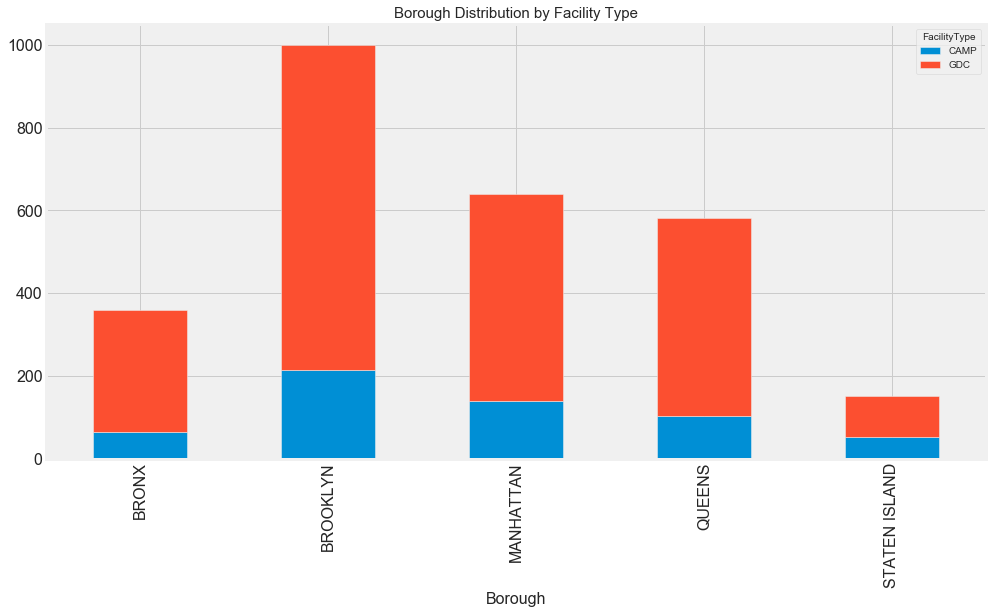

In [34]:
pd.crosstab(new_data.Borough, new_data.FacilityType).plot(kind="bar", figsize=(15,8), stacked=True)
plt.title('Borough Distribution by Facility Type', fontsize = 15)
plt.show()

The majority of facilities are NYC DOHMH-permitted group daycare.

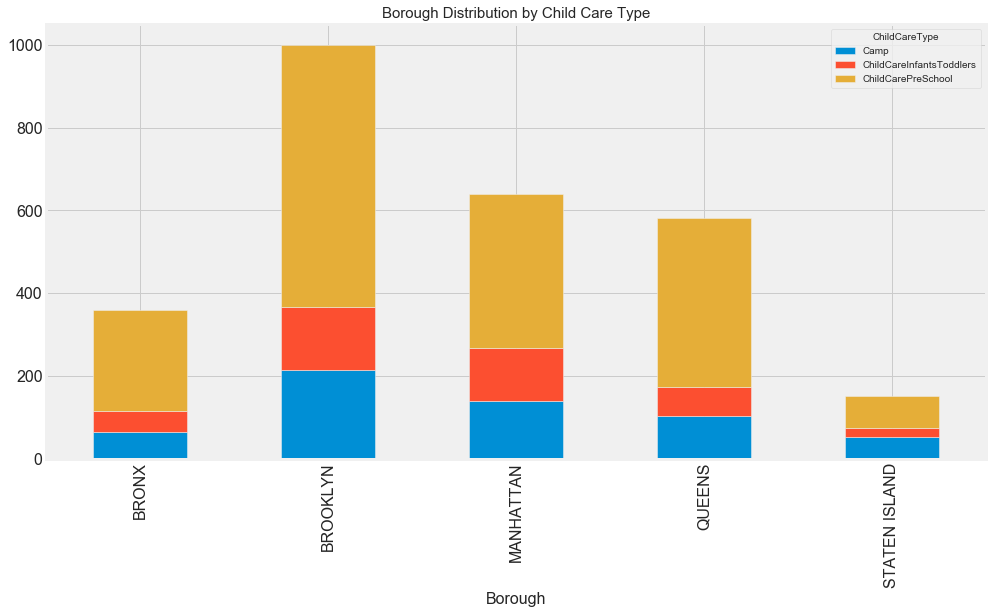

In [35]:
pd.crosstab(new_data.Borough, new_data.ChildCareType).plot(kind="bar", figsize=(15,8), stacked=True)
plt.title('Borough Distribution by Child Care Type', fontsize = 15)
plt.show()

Most of the facilites are caring for pre-school children.

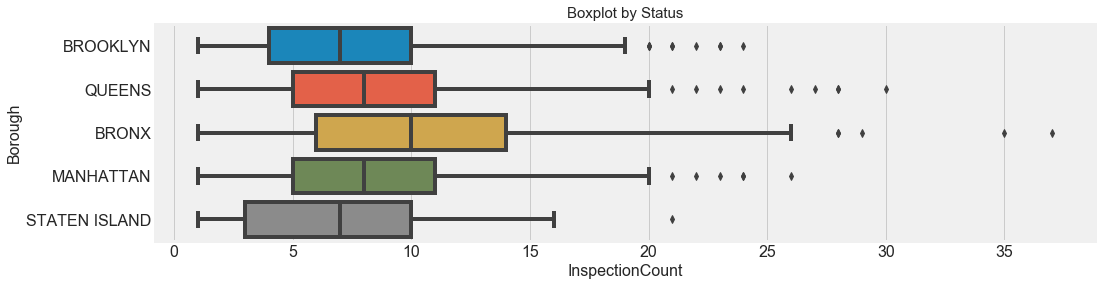

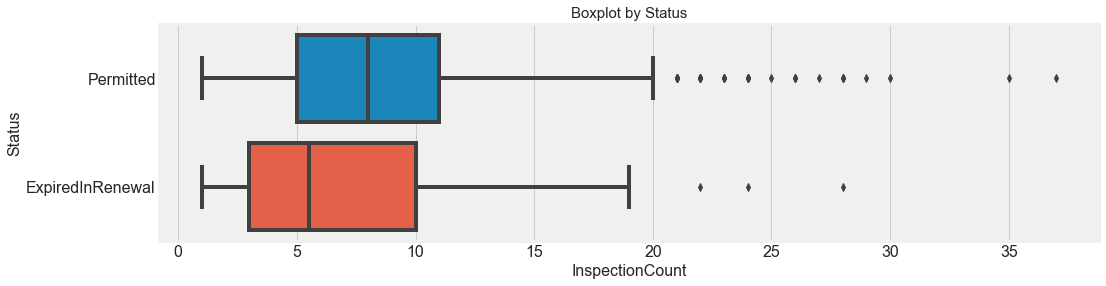

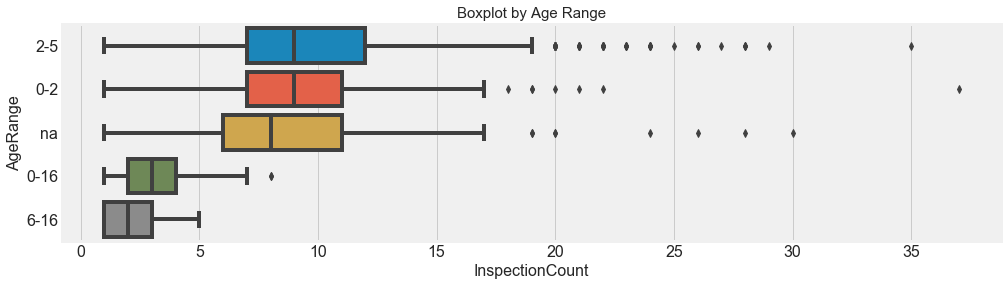

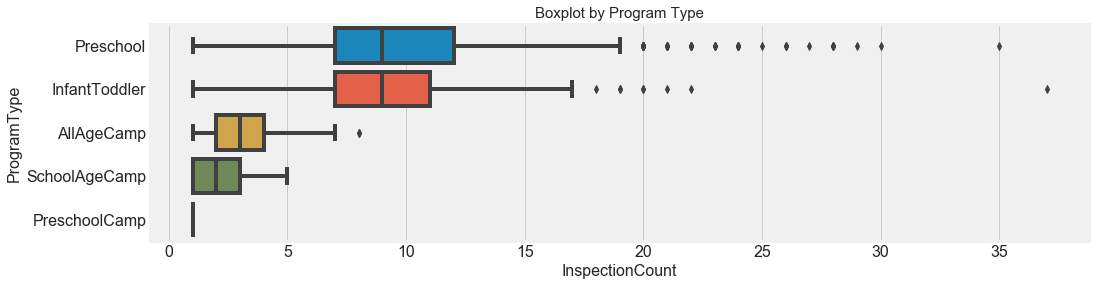

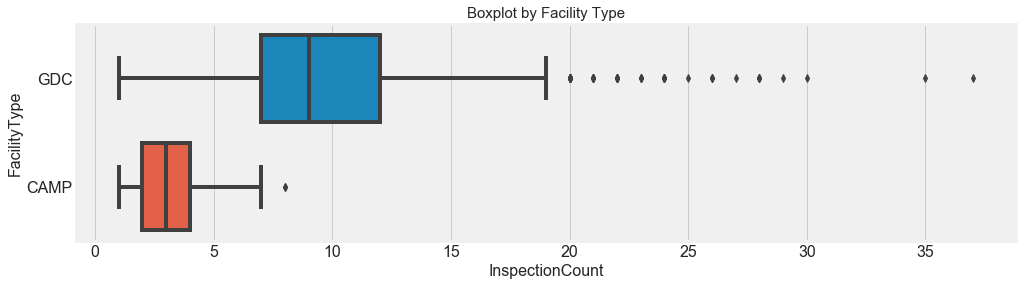

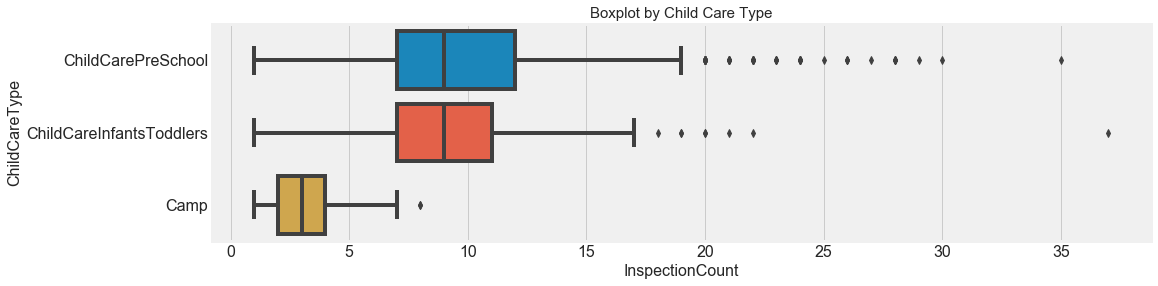

In [36]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
sns.boxplot(new_data.InspectionCount.dropna(), new_data.Borough)
plt.title('Boxplot by Status', fontsize = 15)
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
sns.boxplot(new_data.InspectionCount.dropna(), new_data.Status)
plt.title('Boxplot by Status', fontsize = 15)
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
sns.boxplot(new_data.InspectionCount.dropna(), new_data.AgeRange)
plt.title('Boxplot by Age Range', fontsize = 15)
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
sns.boxplot(new_data.InspectionCount.dropna(), new_data.ProgramType)
plt.title('Boxplot by Program Type', fontsize = 15)
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
sns.boxplot(new_data.InspectionCount.dropna(), new_data.FacilityType)
plt.title('Boxplot by Facility Type', fontsize = 15)
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
sns.boxplot(new_data.InspectionCount.dropna(), new_data.ChildCareType)
plt.title('Boxplot by Child Care Type', fontsize = 15)
plt.show()

Bronx childcare facilities are most frequently inspected. 6-16 age group's daycare centers are least inspected.

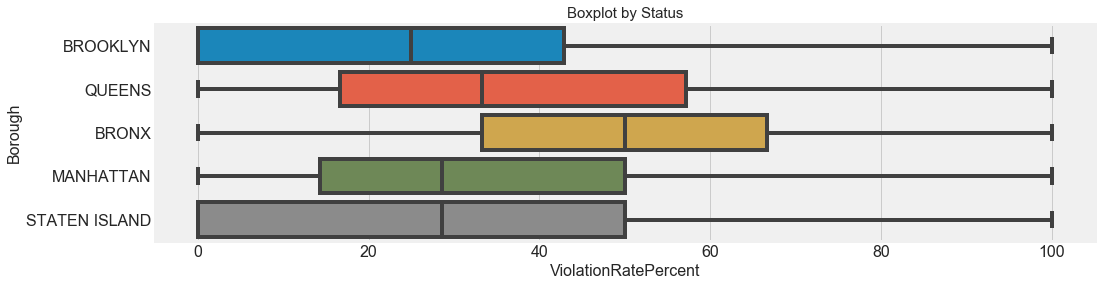

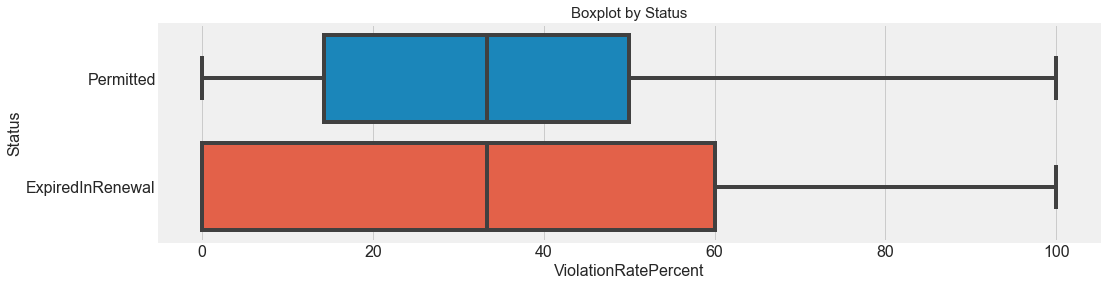

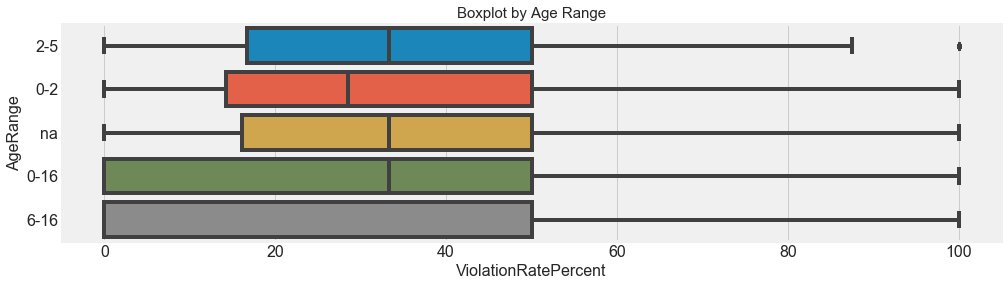

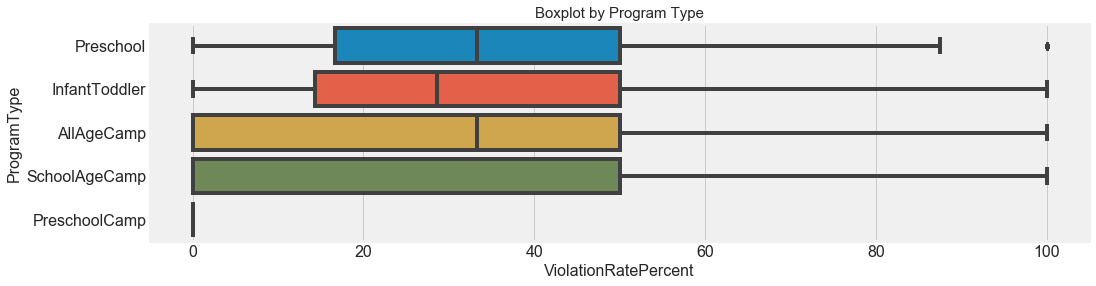

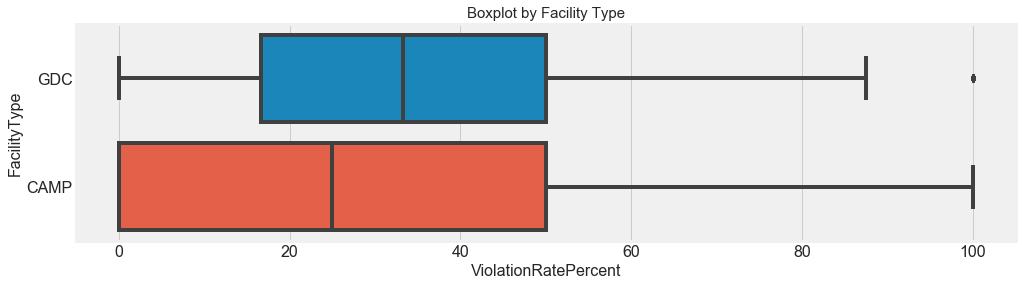

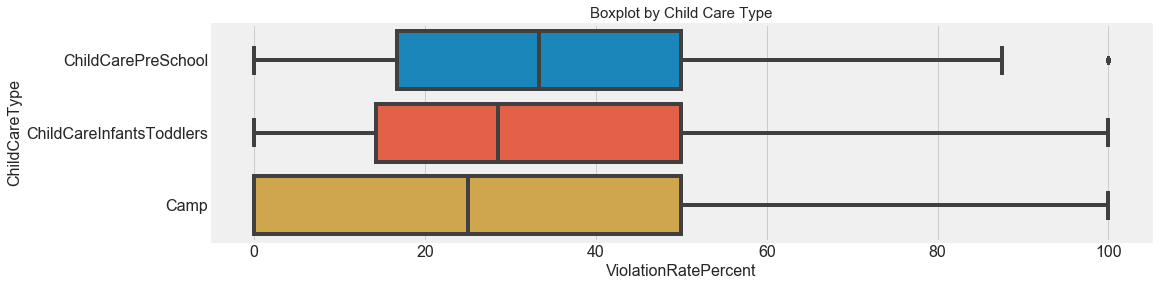

In [37]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
sns.boxplot(new_data.ViolationRatePercent.dropna(), new_data.Borough)
plt.title('Boxplot by Status', fontsize = 15)
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
sns.boxplot(new_data.ViolationRatePercent.dropna(), new_data.Status)
plt.title('Boxplot by Status', fontsize = 15)
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
sns.boxplot(new_data.ViolationRatePercent.dropna(), new_data.AgeRange)
plt.title('Boxplot by Age Range', fontsize = 15)
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
sns.boxplot(new_data.ViolationRatePercent.dropna(), new_data.ProgramType)
plt.title('Boxplot by Program Type', fontsize = 15)
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
sns.boxplot(new_data.ViolationRatePercent.dropna(), new_data.FacilityType)
plt.title('Boxplot by Facility Type', fontsize = 15)
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
sns.boxplot(new_data.ViolationRatePercent.dropna(), new_data.ChildCareType)
plt.title('Boxplot by Child Care Type', fontsize = 15)
plt.show()

0-2 age group (infant/toddler) and CAMP have the lowest violation rate. Bronx has the highest violation rate compared to other borough.

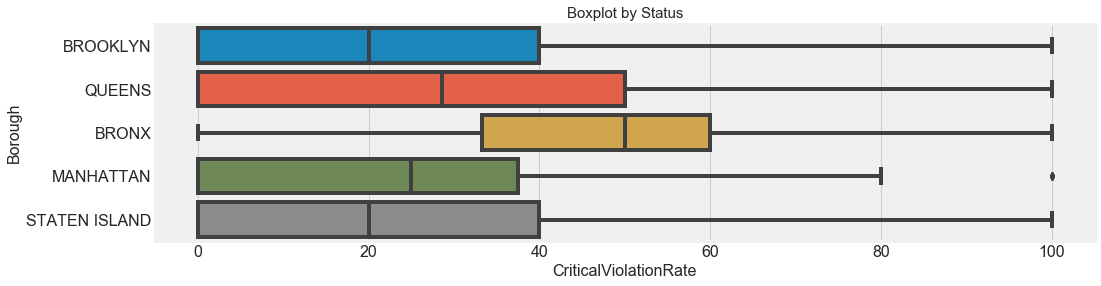

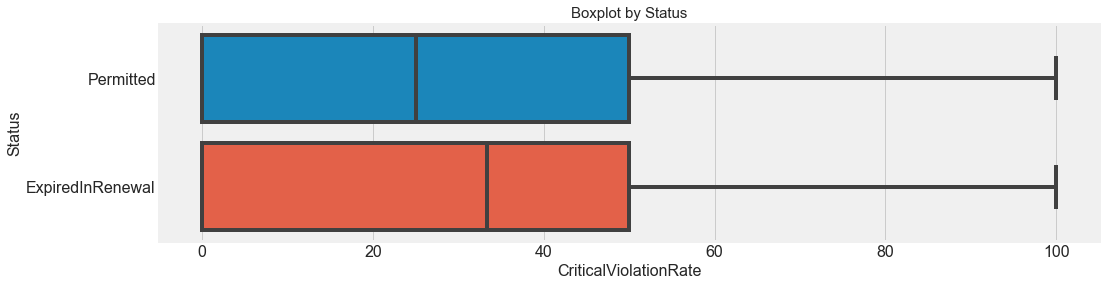

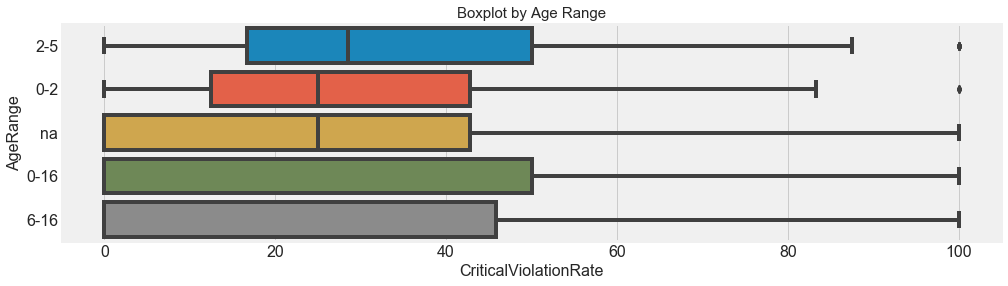

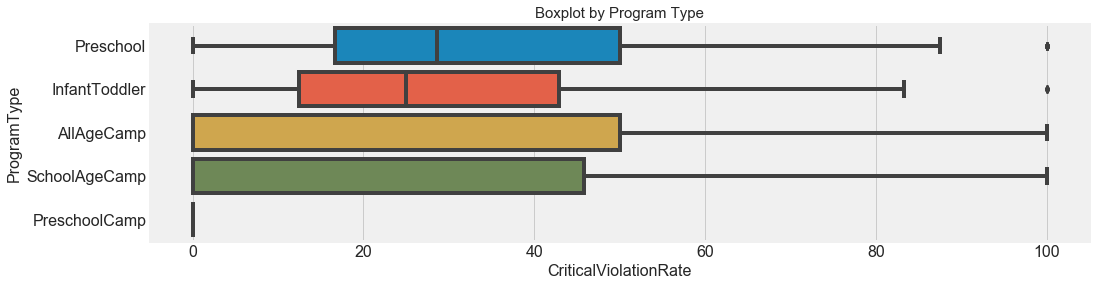

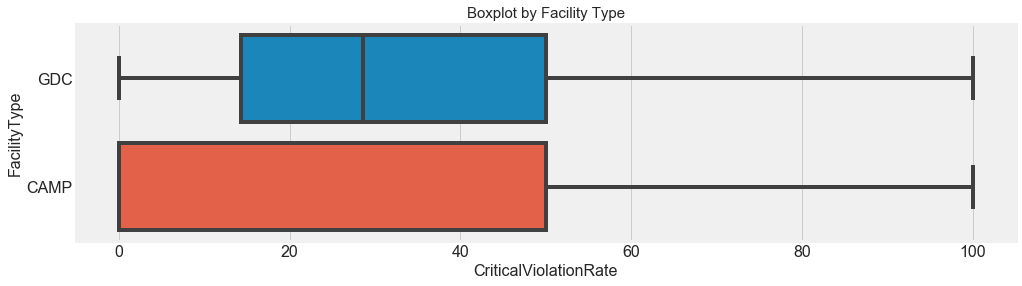

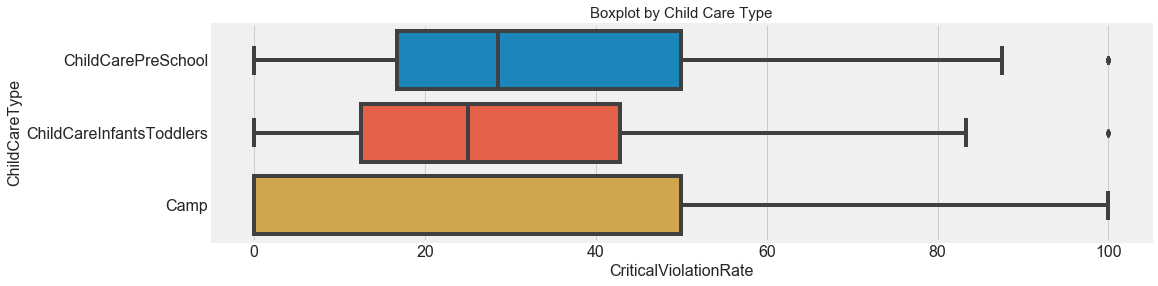

In [38]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
sns.boxplot(new_data.CriticalViolationRate.dropna(), new_data.Borough)
plt.title('Boxplot by Status', fontsize = 15)
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
sns.boxplot(new_data.CriticalViolationRate.dropna(), new_data.Status)
plt.title('Boxplot by Status', fontsize = 15)
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
sns.boxplot(new_data.CriticalViolationRate.dropna(), new_data.AgeRange)
plt.title('Boxplot by Age Range', fontsize = 15)
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
sns.boxplot(new_data.CriticalViolationRate.dropna(), new_data.ProgramType)
plt.title('Boxplot by Program Type', fontsize = 15)
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
sns.boxplot(new_data.CriticalViolationRate.dropna(), new_data.FacilityType)
plt.title('Boxplot by Facility Type', fontsize = 15)
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
sns.boxplot(new_data.CriticalViolationRate.dropna(), new_data.ChildCareType)
plt.title('Boxplot by Child Care Type', fontsize = 15)
plt.show()

Bronx has the highest critical violations.

---

###### Correlation Analysis

In [39]:
num_vars = ['InspectionCount','MaximumCapacity','ViolationRatePercent','AverageViolationRatePercent',
            'TotalEducationalWorkers','AverageTotalEducationalWorkers','PublicHealthHazardViolationRate',
            'AveragePublicHealthHazardViolationRate','CriticalViolationRate','AverageCriticalViolationRate',
            'CriticalViolation', 'GeneralViolation','PublicHealthHazardViolation', 'UnknownViolation',
            'CorrectedViolationStatus', 'OpenViolationStatus','UnknownViolationStatus']
len(num_vars)

17

<Figure size 2160x2160 with 0 Axes>

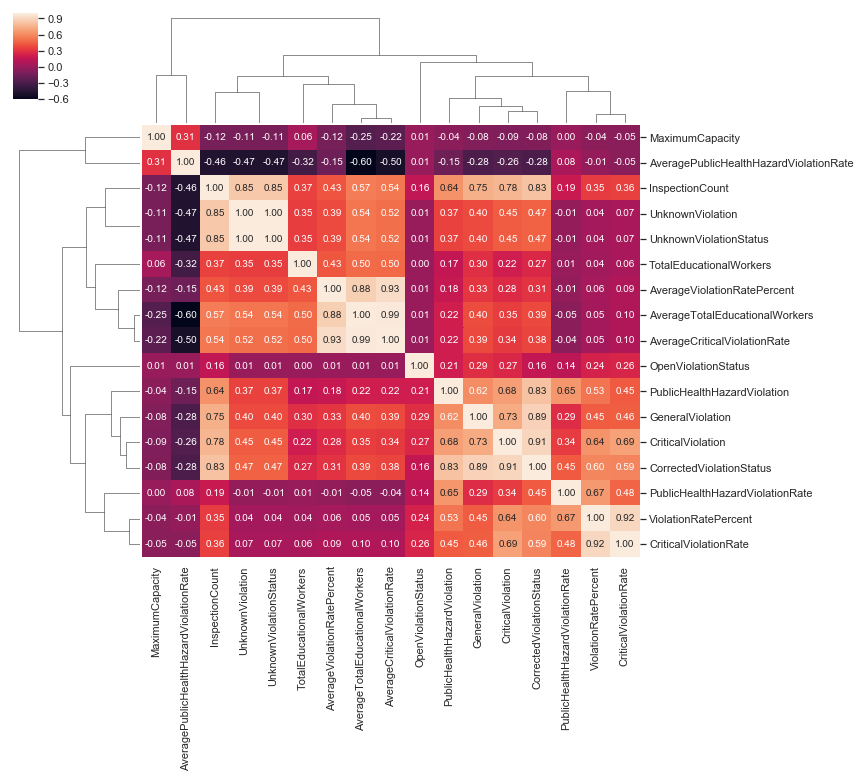

In [40]:
corrmat = new_data[num_vars].corr(method='pearson')

fig = plt.gcf()
fig.set_size_inches(30, 30)
sns.set(font_scale=1.0)
sns.clustermap(corrmat, annot=True,row_cluster=True, col_cluster=True, fmt='.2f', annot_kws={'size': 10})
plt.show()

In [41]:
new_data[['PublicHealthHazardViolation','PublicHealthHazardViolationRate','AveragePublicHealthHazardViolationRate']].corr()

,PublicHealthHazardViolation,PublicHealthHazardViolationRate,AveragePublicHealthHazardViolationRate
PublicHealthHazardViolation,1.000000,0.654684,-0.154554
PublicHealthHazardViolationRate,0.654684,1.000000,0.075166
AveragePublicHealthHazardViolationRate,-0.154554,0.075166,1.000000


In [42]:
# find top correlated features
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(new_data[num_vars], 35))

Top Absolute Correlations
UnknownViolation                        UnknownViolationStatus                    1.000000
AverageTotalEducationalWorkers          AverageCriticalViolationRate              0.992212
AverageViolationRatePercent             AverageCriticalViolationRate              0.931082
ViolationRatePercent                    CriticalViolationRate                     0.915211
CriticalViolation                       CorrectedViolationStatus                  0.909189
GeneralViolation                        CorrectedViolationStatus                  0.891108
AverageViolationRatePercent             AverageTotalEducationalWorkers            0.878388
InspectionCount                         UnknownViolationStatus                    0.854462
                                        UnknownViolation                          0.854462
PublicHealthHazardViolation             CorrectedViolationStatus                  0.830222
InspectionCount                         CorrectedViolationStatus

---

###### Predicting Future Public Health Hazard Violation

In [44]:
# create a label
def maphazard(x):
    if (x == 0):
        return '0'
    else:
        return '1'

new_data['IsHazard'] = new_data['PublicHealthHazardViolation'].apply(maphazard).astype(str)
print(new_data['IsHazard'].value_counts())

1    1443
0    1288
Name: IsHazard, dtype: int64


In [45]:
new_data.head()

,DayCareID,PermitNumber,BuildingID,Borough,DatePermitted,Actual,PermitExpiration,Status,AgeRange,ProgramType,FacilityType,ChildCareType,InspectionCount,MaximumCapacity,ViolationRatePercent,AverageViolationRatePercent,TotalEducationalWorkers,AverageTotalEducationalWorkers,PublicHealthHazardViolationRate,AveragePublicHealthHazardViolationRate,CriticalViolationRate,AverageCriticalViolationRate,CriticalViolation,GeneralViolation,PublicHealthHazardViolation,UnknownViolation,CorrectedViolationStatus,OpenViolationStatus,UnknownViolationStatus,IsHazard
0,DC1000,002165,3054624,BROOKLYN,2004-03-30,N,2020-04-06,Permitted,2-5,Preschool,GDC,ChildCarePreSchool,12,70,14.2857,34.5374,7,11.5288,14.2857,14.3262,14.2857,31.0829,1,3,2,8,6,0,8,1
1,DC1017,005465,3124528,BROOKLYN,1988-09-15,Y,2020-12-16,Permitted,2-5,Preschool,GDC,ChildCarePreSchool,7,105,20.0000,34.5374,12,11.5288,0.0000,14.3262,20.0000,31.0829,1,4,0,3,4,1,3,0
2,DC1021,004135,3063253,BROOKLYN,2003-11-24,N,2019-08-07,Permitted,2-5,Preschool,GDC,ChildCarePreSchool,18,162,33.3333,34.5374,24,11.5288,0.0000,14.3262,33.3333,31.0829,6,6,0,10,10,2,10,0
3,DC10244,006700,4436607,QUEENS,2003-12-01,N,2019-12-04,Permitted,2-5,Preschool,GDC,ChildCarePreSchool,9,150,20.0000,34.5374,49,11.5288,0.0000,14.3262,20.0000,31.0829,2,1,0,7,3,0,7,0
4,DC1025,006699,3000000,BROOKLYN,2005-09-14,N,2019-09-14,Permitted,2-5,Preschool,GDC,ChildCarePreSchool,9,17,50.0000,34.5374,3,11.5288,16.6667,14.3262,50.0000,31.0829,3,3,1,6,6,1,6,1


For this prediction, we will exclude the 3 Public Health Hazard Violation features (i.e. 'PublicHealthHazardViolation', 'PublicHealthHazardViolationRate', and 'AveragePublicHealthHazardViolationRate'). We will also exclude the averages, as well as any redundent features.

In [46]:
x_vars = ['DayCareID', 'PermitNumber', 'BuildingID', 'Borough', 'Status', 'AgeRange', 'ProgramType',
          'FacilityType', 'ChildCareType', 'InspectionCount', 'MaximumCapacity','TotalEducationalWorkers', 
          'CriticalViolation', 'GeneralViolation', 'UnknownViolation', 'CorrectedViolationStatus', 
          'OpenViolationStatus', 'UnknownViolationStatus']
print(len(x_vars))

cat_feats = ['Borough', 'Status', 'AgeRange', 'ProgramType', 'FacilityType', 'ChildCareType']
print(len(cat_feats))

18
6


In [47]:
X = new_data.filter(x_vars).drop(columns = ['DayCareID', 'PermitNumber', 'BuildingID'])
y = new_data['IsHazard']
X.shape, y.shape

((2731, 15), (2731,))

In [48]:
# create dummy variables
X = pd.get_dummies(X, columns=cat_feats)
print(X.shape)
list(X)

(2731, 31)


['InspectionCount',
 'MaximumCapacity',
 'TotalEducationalWorkers',
 'CriticalViolation',
 'GeneralViolation',
 'UnknownViolation',
 'CorrectedViolationStatus',
 'OpenViolationStatus',
 'UnknownViolationStatus',
 'Borough_BRONX',
 'Borough_BROOKLYN',
 'Borough_MANHATTAN',
 'Borough_QUEENS',
 'Borough_STATEN ISLAND',
 'Status_ExpiredInRenewal',
 'Status_Permitted',
 'AgeRange_0-16',
 'AgeRange_0-2',
 'AgeRange_2-5',
 'AgeRange_6-16',
 'AgeRange_na',
 'ProgramType_AllAgeCamp',
 'ProgramType_InfantToddler',
 'ProgramType_Preschool',
 'ProgramType_PreschoolCamp',
 'ProgramType_SchoolAgeCamp',
 'FacilityType_CAMP',
 'FacilityType_GDC',
 'ChildCareType_Camp',
 'ChildCareType_ChildCareInfantsToddlers',
 'ChildCareType_ChildCarePreSchool']

In [49]:
from sklearn.feature_selection import RFE
from hyperopt import hp, tpe
from hyperopt.fmin import fmin

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier
import lightgbm as lgbm
from sklearn.metrics import make_scorer
from sklearn import model_selection

In [50]:
model = DecisionTreeClassifier(max_depth=5, random_state=0)

rfe = RFE(model, 15)
rfe = rfe.fit(X, y)

print(rfe.support_)
print(rfe.ranking_)

plt.show()

[False  True  True  True  True False  True  True  True False False False
 False False False False False False False False False False False  True
  True  True  True  True  True  True  True]
[17  1  1  1  1  2  1  1  1  4  6  8 10 12 14 16 15 13 11  9  7  5  3  1
  1  1  1  1  1  1  1]


In [51]:
X.columns[rfe.support_]

Index(['MaximumCapacity', 'TotalEducationalWorkers', 'CriticalViolation',
       'GeneralViolation', 'CorrectedViolationStatus', 'OpenViolationStatus',
       'UnknownViolationStatus', 'ProgramType_Preschool',
       'ProgramType_PreschoolCamp', 'ProgramType_SchoolAgeCamp',
       'FacilityType_CAMP', 'FacilityType_GDC', 'ChildCareType_Camp',
       'ChildCareType_ChildCareInfantsToddlers',
       'ChildCareType_ChildCarePreSchool'],
      dtype='object')

In [52]:
keep_vars =   ['MaximumCapacity', 'TotalEducationalWorkers', 'CriticalViolation',
               'GeneralViolation', 'CorrectedViolationStatus', 'OpenViolationStatus',
               'UnknownViolationStatus', 'ProgramType_Preschool',
               'ProgramType_PreschoolCamp', 'ProgramType_SchoolAgeCamp',
               'FacilityType_CAMP', 'FacilityType_GDC', 'ChildCareType_Camp',
               'ChildCareType_ChildCareInfantsToddlers',
               'ChildCareType_ChildCarePreSchool']
len(keep_vars)

15

In [53]:
X = X.filter(keep_vars)

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=1)

print(X_train.shape, y_train.shape, X_valid.shape, y_valid.shape)

(1911, 15) (1911,) (820, 15) (820,)


In [54]:
def gini(truth, predictions):
    g = np.asarray(np.c_[truth, predictions, np.arange(len(truth)) ], dtype=np.float)
    g = g[np.lexsort((g[:,2], -1*g[:,1]))]
    gs = g[:,0].cumsum().sum() / g[:,0].sum()
    gs -= (len(truth) + 1) / 2.
    return gs / len(truth)

def gini_xgb(predictions, truth):
    truth = truth.get_label()
    return 'gini', -1.0 * gini(truth, predictions) / gini(truth, truth)

def gini_lgb(truth, predictions):
    score = gini(truth, predictions) / gini(truth, truth)
    return 'gini', score, True

def gini_sklearn(truth, predictions):
    return gini(truth, predictions) / gini(truth, truth)

gini_scorer = make_scorer(gini_sklearn, greater_is_better=True, needs_proba=True)

In [55]:
def objective(params):
    params = {'n_estimators': int(params['n_estimators']), 'max_depth': int(params['max_depth'])}
    clf = RandomForestClassifier(n_jobs=4, class_weight='balanced', random_state=123, **params)
    score = cross_val_score(clf, X_train, y_train, scoring=gini_scorer, cv=StratifiedKFold()).mean()
    print("Gini {:.3f} params {}".format(score, params))
    return score

space = {
    'n_estimators': hp.quniform('n_estimators', 25, 500, 25),
    'max_depth': hp.quniform('max_depth', 1, 10, 1)
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=15)

Gini 0.876 params {'n_estimators': 175, 'max_depth': 10}
Gini 0.874 params {'n_estimators': 75, 'max_depth': 10}                      
Gini 0.736 params {'n_estimators': 200, 'max_depth': 3}                      
Gini 0.827 params {'n_estimators': 200, 'max_depth': 7}                      
Gini 0.691 params {'n_estimators': 200, 'max_depth': 2}                      
Gini 0.689 params {'n_estimators': 25, 'max_depth': 2}                       
Gini 0.827 params {'n_estimators': 200, 'max_depth': 7}                      
Gini 0.793 params {'n_estimators': 25, 'max_depth': 5}                       
Gini 0.763 params {'n_estimators': 475, 'max_depth': 4}                      
Gini 0.789 params {'n_estimators': 50, 'max_depth': 5}                       
Gini 0.847 params {'n_estimators': 300, 'max_depth': 8}                       
Gini 0.830 params {'n_estimators': 375, 'max_depth': 7}                       
Gini 0.698 params {'n_estimators': 375, 'max_depth': 2}                       
Gini

In [56]:
print("Hyperopt estimated optimum {}".format(best))

Hyperopt estimated optimum {'max_depth': 2.0, 'n_estimators': 25.0}


In [57]:
def objective(params):
    params = {
        'max_depth': int(params['max_depth']),
        'gamma': "{:.3f}".format(params['gamma']),
        'colsample_bytree': '{:.3f}'.format(params['colsample_bytree']),
    }
    
    clf = xgb.XGBClassifier(
        n_estimators=250,
        learning_rate=0.05,
        n_jobs=4,
        random_state=123,
        **params
    )
    
    score = cross_val_score(clf, X_train, y_train, scoring=gini_scorer, cv=StratifiedKFold()).mean()
    print("Gini {:.3f} params {}".format(score, params))
    return score

space = {
    'max_depth': hp.quniform('max_depth', 2, 8, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1.0),
    'gamma': hp.uniform('gamma', 0.0, 0.5),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=15)

Gini 0.874 params {'max_depth': 3, 'gamma': '0.195', 'colsample_bytree': '0.439'}
Gini 0.967 params {'max_depth': 5, 'gamma': '0.283', 'colsample_bytree': '0.732'}
Gini 0.979 params {'max_depth': 6, 'gamma': '0.456', 'colsample_bytree': '0.835'}
Gini 0.978 params {'max_depth': 5, 'gamma': '0.140', 'colsample_bytree': '0.978'}
Gini 0.982 params {'max_depth': 6, 'gamma': '0.469', 'colsample_bytree': '0.944'}
Gini 0.977 params {'max_depth': 7, 'gamma': '0.092', 'colsample_bytree': '0.851'}
Gini 0.901 params {'max_depth': 3, 'gamma': '0.018', 'colsample_bytree': '0.496'}
Gini 0.848 params {'max_depth': 2, 'gamma': '0.213', 'colsample_bytree': '0.506'}
Gini 0.969 params {'max_depth': 7, 'gamma': '0.086', 'colsample_bytree': '0.728'}
Gini 0.969 params {'max_depth': 7, 'gamma': '0.197', 'colsample_bytree': '0.689'}
Gini 0.959 params {'max_depth': 3, 'gamma': '0.202', 'colsample_bytree': '0.896'}
Gini 0.842 params {'max_depth': 3, 'gamma': '0.161', 'colsample_bytree': '0.387'}
Gini 0.903 param

In [58]:
print("Hyperopt estimated optimum {}".format(best))

Hyperopt estimated optimum {'colsample_bytree': 0.30762872630677957, 'gamma': 0.15260695304565258, 'max_depth': 8.0}


In [59]:
def objective(params):
    params = {
        'num_leaves': int(params['num_leaves']),
        'colsample_bytree': '{:.3f}'.format(params['colsample_bytree']),
    }
    
    clf = lgbm.LGBMClassifier(
        n_estimators=500,
        learning_rate=0.01,
        random_state=123,
        **params
    )
    
    score = cross_val_score(clf, X_train, y_train, scoring=gini_scorer, cv=StratifiedKFold()).mean()
    print("Gini {:.3f} params {}".format(score, params))
    return score

space = {
    'num_leaves': hp.quniform('num_leaves', 8, 128, 2),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1.0),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=15)

Gini 0.835 params {'num_leaves': 32, 'colsample_bytree': '0.411'}
Gini 0.876 params {'num_leaves': 118, 'colsample_bytree': '0.484'}           
Gini 0.876 params {'num_leaves': 88, 'colsample_bytree': '0.525'}            
Gini 0.894 params {'num_leaves': 8, 'colsample_bytree': '0.726'}             
Gini 0.903 params {'num_leaves': 116, 'colsample_bytree': '0.559'}           
Gini 0.874 params {'num_leaves': 16, 'colsample_bytree': '0.466'}            
Gini 0.959 params {'num_leaves': 116, 'colsample_bytree': '0.855'}           
Gini 0.803 params {'num_leaves': 42, 'colsample_bytree': '0.370'}            
Gini 0.966 params {'num_leaves': 46, 'colsample_bytree': '0.975'}            
Gini 0.876 params {'num_leaves': 122, 'colsample_bytree': '0.507'}          
Gini 0.962 params {'num_leaves': 20, 'colsample_bytree': '0.858'}            
Gini 0.938 params {'num_leaves': 120, 'colsample_bytree': '0.716'}           
Gini 0.965 params {'num_leaves': 88, 'colsample_bytree': '0.994'}            

In [60]:
print("Hyperopt estimated optimum {}".format(best))

Hyperopt estimated optimum {'colsample_bytree': 0.3697625292837523, 'num_leaves': 42.0}


In [61]:
rf_model = RandomForestClassifier(
    n_jobs=4,
    class_weight='balanced',
    n_estimators=25,
    max_depth=2,
    random_state=123
)

xgb_model = xgb.XGBClassifier(
    n_estimators=250,
    learning_rate=0.05,
    n_jobs=4,
    max_depth=8,
    colsample_bytree=0.31,
    gamma=0.15,
    random_state=123
)

lgbm_model = lgbm.LGBMClassifier(
    n_estimators=500,
    learning_rate=0.01,
    num_leaves=42,
    colsample_bytree=0.37,
    random_state=123
)

models = [
    ('Random Forest', rf_model),
    ('XGBoost', xgb_model),
    ('LightGBM', lgbm_model),
]

for label, model in models:
    scores = cross_val_score(model, X_train, y_train, cv=StratifiedKFold(), scoring=gini_scorer)
    print("Gini coefficient: %0.4f (+/- %0.4f) [%s]" % (scores.mean(), scores.std(), label))

Gini coefficient: 0.6890 (+/- 0.0289) [Random Forest]
Gini coefficient: 0.8148 (+/- 0.0116) [XGBoost]
Gini coefficient: 0.8032 (+/- 0.0090) [LightGBM]


In [62]:
clf1 = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                              criterion='gini', max_depth=2, max_features='auto',
                              max_leaf_nodes=None, min_impurity_decrease=0.0,
                              min_impurity_split=None, min_samples_leaf=1,
                              min_samples_split=2, min_weight_fraction_leaf=0.0,
                              n_estimators=25, n_jobs=4, oob_score=False, random_state=123,
                              verbose=0, warm_start=False)

clf2 = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                     colsample_bynode=1, colsample_bytree=0.31, gamma=0.15,
                     learning_rate=0.05, max_delta_step=0, max_depth=8,
                     min_child_weight=1, missing=None, n_estimators=250, n_jobs=4,
                     nthread=None, objective='binary:logistic', random_state=123,
                     reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                     silent=None, subsample=1, verbosity=1)

clf3 = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.37,
                      importance_type='split', learning_rate=0.01, max_depth=-1,
                      min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                      n_estimators=500, n_jobs=-1, num_leaves=42, objective=None,
                      random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
                      subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


print('10-fold cross validation:\n')

for clf, label in zip([clf1, clf2, clf3], 
                      ['Random Forest', 
                       'XGBoost',
                       'LightGBM']):
    scores = model_selection.cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')

    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

10-fold cross validation:

Accuracy: 0.79 (+/- 0.04) [Random Forest]
Accuracy: 0.84 (+/- 0.03) [XGBoost]
Accuracy: 0.83 (+/- 0.03) [LightGBM]


In [63]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support, accuracy_score)

In [64]:
rf = clf1.fit(X_train, y_train)

y_pred = rf.predict(X_valid)


print('Accuracy:')
print(accuracy_score(y_valid, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_valid, y_pred))
print("Classification Report:")
print(classification_report(y_valid, y_pred))

Accuracy:
0.7719512195121951
Confusion Matrix:
[[274  92]
 [ 95 359]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.75      0.75       366
           1       0.80      0.79      0.79       454

   micro avg       0.77      0.77      0.77       820
   macro avg       0.77      0.77      0.77       820
weighted avg       0.77      0.77      0.77       820



In [65]:
xgb = clf2.fit(X_train, y_train)

y_pred = xgb.predict(X_valid)

print('Accuracy:')
print(accuracy_score(y_valid, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_valid, y_pred))
print("Classification Report:")
print(classification_report(y_valid, y_pred))

Accuracy:
0.8329268292682926
Confusion Matrix:
[[303  63]
 [ 74 380]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       366
           1       0.86      0.84      0.85       454

   micro avg       0.83      0.83      0.83       820
   macro avg       0.83      0.83      0.83       820
weighted avg       0.83      0.83      0.83       820



In [66]:
lgbm = clf3.fit(X_train, y_train)

y_pred = lgbm.predict(X_valid)

print('Accuracy:')
print(accuracy_score(y_valid, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_valid, y_pred))
print("Classification Report:")
print(classification_report(y_valid, y_pred))

Accuracy:
0.824390243902439
Confusion Matrix:
[[297  69]
 [ 75 379]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80       366
           1       0.85      0.83      0.84       454

   micro avg       0.82      0.82      0.82       820
   macro avg       0.82      0.82      0.82       820
weighted avg       0.82      0.82      0.82       820



XGBoost model gives the best overall performance.

---

###### Regulation Summary WordCloud

In [67]:
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [68]:
exspace = re.compile('[/(){}\[\]\|@,;]')
exsymbols = re.compile('[^0-9a-z #+_]')
stopwords = set(stopwords.words('english'))
def text_prepare(text):
    text = text.lower()# lowercase text  
    text = exspace.sub(' ',text)# replace exspace symbols by space in text    
    text = exsymbols.sub('',text)# delete symbols which are in exsymbols from text    
    temp = [s.strip() for s in text.split() if s not in stopwords]# delete stopwords from text
    new_text = ''
    for i in temp:
        new_text +=i+' '
    text = new_text
    return text.strip()

In [69]:
text = data[['DayCareID', 'PermitNumber', 'BuildingID', 'RegulationSummary']]
text = text[text.RegulationSummary != '']
text = text.drop_duplicates()
text["RegulationSummary"] = text["RegulationSummary"].apply(lambda x: " ".join(x.lower() for x in x.split()))
text['RegulationSummary'] = text['RegulationSummary'].map(text_prepare)

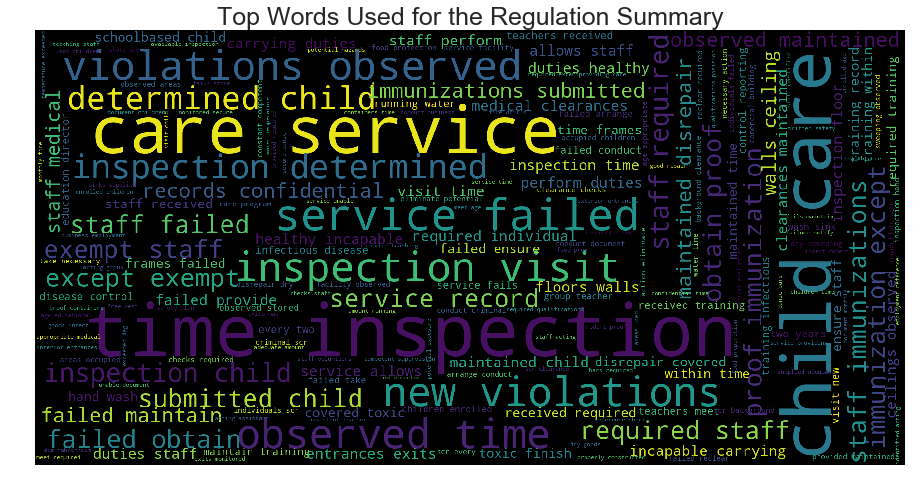

In [70]:
wordcloud = WordCloud(max_words = 500, max_font_size=50, width=600, 
                      height=300, background_color = 'black',
                      scale = 3, random_state = 0).generate(' '.join(text['RegulationSummary'].values))
plt.figure(figsize=(20,8))
plt.imshow(wordcloud)
plt.title("Top Words Used for the Regulation Summary", fontsize=25)
plt.axis("off")
plt.show() 